## Final Project Submission

Please fill out:
* Student name: Filiz Camuz
* Student pace: Self Paced 
* Scheduled project review date/time: end of June
* Instructor name: Eli
* Blog post URL: 


# Title

dgsdfsd
sdgfsdkgfs
sdjfskdf



##OSEMN Process¶
#Obtain

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

#Scrub

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

#Explore

This step focuses on getting to know the dataset you're working with. This step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that. At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

#Model

This step consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

#Interpret

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.


###Obtain

The requiremen for this project is to come up with a model to predict house price in Kings County.  area. The Kings County Housing Data dataset was given to solve this problem. Now I will import the necessary libraries and the dataset to explore. 


In [84]:
#import all necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid')

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# Feature Selection
from sklearn.feature_selection import RFE
# Scaler
from sklearn.preprocessing import MinMaxScaler

import warnings

In [85]:
# Loading data into pandas DataFrame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


There are 21 rows, I can not see all the column names. I will paste the column descriptions below. 

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price  is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number  of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15**- The square footage of the land lots of the nearest 15 neighbors



Some column names are not well described (view, sqrft_living15, sqrft_lot15).  

In [86]:
df.shape

(21597, 21)

In [87]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [89]:
# Data types are numeric and string. 

### Data Scrubbing

First thing I will check is the nul values: I will use .isna() for that purpose.

In [90]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view feature has only 63 missing value, however, waterfront has 2376, and yr_renovated has 3842 null values out of 21597 observations. I will check each one of them individually to see what I can do for those missing values.     

# Null values

## 1 : view & waterfront

In [91]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I have checked the unique values; there are values like 0,1,2,3,4. I first assumed these are the number of times this house was viewed by buyers before a purchase.However it sounds a bit odd to buy a house without viewing at least once. So the other option would be some sort of appealing view is available for this house. Although there is one feature as "waterfront", this could be a general clolumn identifying the houses has some special views  such as forest, city..etc I woudl like to check if there is such relationship between waterfron and view in that term.    

I want to first check if all view values are different than 0 for all of the waterfront values are 1. 


In [92]:
df.view[df['waterfront']==1].value_counts()

4.0    123
3.0     14
2.0      7
1.0      1
Name: view, dtype: int64

In [93]:
df.waterfront[df['view']==0].value_counts()

0.0    17312
Name: waterfront, dtype: int64

There is no 0 in the view when waterfront is 1 and waterfron is always 0 when view is 0 except null values. I can use this information for filling out some of the null values. 
Beacuse it means that when view is 0 then null values in waterfront should be replaced with 0. 

In [94]:
df.waterfront[df['view']==0]=0

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df.waterfront.isna().sum()

266

This took care of most of the missing values in waterfront. Rest of them is unknown. 

In [96]:
df.lat[df['waterfront']==1].head()

49     47.4041
230    47.4497
246    47.6338
264    47.4683
300    47.6053
Name: lat, dtype: float64

In [97]:
df.lat[df['waterfront']==0].head()

0    47.5112
1    47.7210
2    47.7379
3    47.5208
4    47.6168
Name: lat, dtype: float64

I have tried to see if there is any significant difference between latitude or longtitude between waterfront or non waterfront houses but , it is hard to make comparisons among such close numbers. So I just decided to drop these columns since these is just realtively small amount of data. But still it is almost %1 of the data whole number of observation. Let me see what the distrivution look like on this feature. 

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


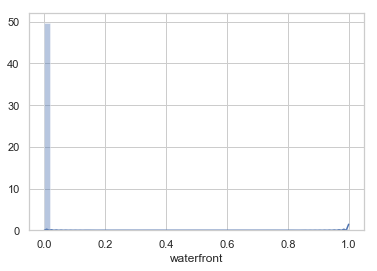

In [98]:
# Delete these row indexes from dataFrame
#df.drop(df[ df['waterfront'].isna() ].index, inplace=True)
sns.distplot( df[df.waterfront.notna()]['waterfront'] )



The histogram chart was not able to show 1 values because of it is comparingly too small so I have used distplot to visualise. It wOuld not hurt the convert rest of the null values in to 0 because it would not do any dramaric effect on the result and I can still keep the rest of the data for the other features in those rows.  

In [99]:
df.waterfront=df.waterfront.fillna(0)


In [100]:
#convert waterfront type to boolean



In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Now let me see how the view distirbuted. 

# of missing values in the view column 63


Text(0,0.5,'# of Houses')

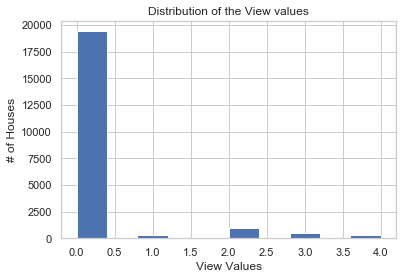

In [102]:
print("# of missing values in the view column", df.view.isna().sum())

df.view.hist()
plt.title("Distribution of the View values")
plt.xlabel("View Values")
plt.ylabel("# of Houses")

Missing values in the view is also small numnber and the value of "0" is vrey large. I can replace all nul values with "0"and that would not hurt the distribution much.

In [103]:
df.view=df.view.fillna(0)
df.view.isna().sum()

0

## yr_renovated

In [104]:
df.yr_renovated.unique()



array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

I would like to cross check this feature and date feature. Because there is already a yr_built for year. So what about date? 


In [105]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


When I compare the values in the same rows, it seems no connection. the date is probably the last date that the house was sold. No luck on yr_renovation yet. I now think that since these are years and I can not use them as numbers in my model, I will need convert them in to categorical data. Ninning is the best option.I will put all null values in to a bin as well. 

### Binning yr_renovated

In [106]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

the renovation years vary from 1991 to 2015. The bins can be [null, 0, 2000, 2015]. All the 0s would go to 1990 bin. 

In [107]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [108]:
bins=[-1,0,1990,2001, 2011,2016] #set bins

bins_renovated = pd.cut(df['yr_renovated'], bins)
bins_renovated = bins_renovated.cat.as_unordered()
df.yr_renovated=bins_renovated
df.yr_renovated= df.yr_renovated.cat.codes

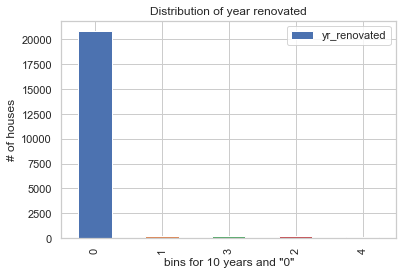

In [109]:
df.yr_renovated.astype("category")
labels =[0,1990_2000, 2001_2010, 2011_2016]
df.yr_renovated.value_counts().plot(kind='bar')
plt.legend()
plt.title("Distribution of year renovated")
plt.xlabel('bins for 10 years and "0"')
plt.ylabel ('# of houses')
plt.show()

I will drop this first bin after I do One-Hot-Encoding. 

In [110]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So far , I have took care oo all null values in the dataset. Now let me check the data types and fix if needed. 


## Altering Data Types

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), int8(1), object(2)
memory usage: 3.3+ MB


id column is not needed for the model. I will drop it. 



In [112]:
df.drop(['id'], axis=1, inplace=True)

In [113]:
#Date converted into datetime
df['date'] = pd.to_datetime(df['date'])

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of price values')

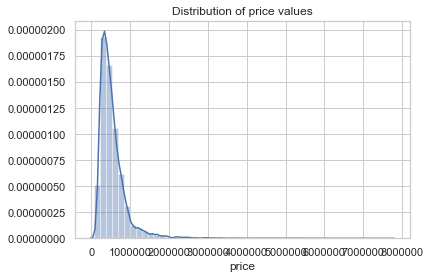

In [114]:

sns.distplot( df['price'] )
plt.title('Distribution of price values')


There is a lon tail. Let me check the box plot. 

In [115]:
"""fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot( df.loc[df['price'] < 4000000, ['price']])"""

"fig1, ax1 = plt.subplots()\nax1.set_title('Basic Plot')\nax1.boxplot( df.loc[df['price'] < 4000000, ['price']])"

In [116]:
#I will use this in the exploration part. 

# df.hist(figsize=(18,18))


# df['yr_renovated'] = df['yr_renovated'].astype(bool)




In [117]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


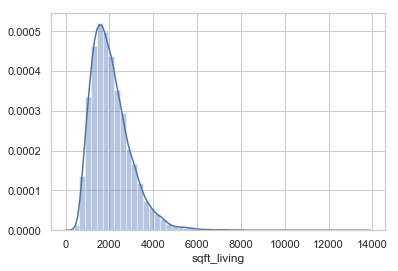

In [118]:
sns.distplot(df.sqft_living)

In [119]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [120]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [121]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


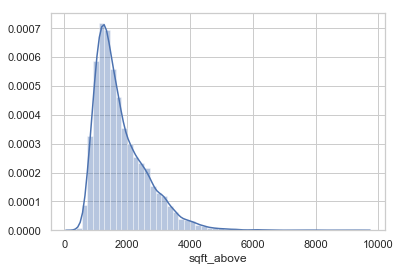

In [122]:
sns.distplot(df.sqft_above)

In [123]:
df.yr_built.describe()
#this one needs binning. 

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [124]:

bins=[1900,1930,1960,1990,2020]
bins_built= pd.cut(df['yr_built'], bins)
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built
df.yr_built= df.yr_built.cat.codes



In [125]:
df.yr_built.astype('category')
df.yr_built.value_counts()


 2    7293
 3    6671
 1    4901
 0    2645
-1      87
Name: yr_built, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int8
yr_renovated     21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(9), int8(2), object(1)
memory usage: 3.0+ MB


/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


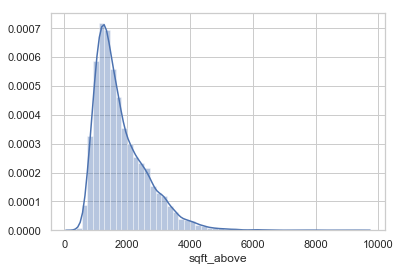

In [127]:
sns.distplot(df.sqft_above)

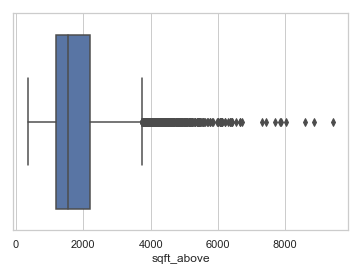

In [128]:
sns.boxplot(df.sqft_above)

In [129]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [130]:
df.sqft_basement[df.sqft_basement=='?'].count()

454

I have noticed that sqft_basement feature is object type. I wanted to convert it to float, but because of a string value ("?"), it did not let me to do. To be able replace ? with any number, I need to convert them to NaN. Because that is a value both str and onject category can recognize. 

In [131]:
df['sqft_basement'] = np.where(
    df.sqft_basement.eq('?'), np.NaN, df['sqft_basement'] .str[:-1]
)

In [132]:
df.sqft_basement=df.sqft_basement.astype('float')

My first intention was filling NaN with the mean of this column, however, I wanted to see if there is any  relationship between 'sqft_basement', 'sqft_above', 'sqft_living' features. What I see is they are sqft_basement is the difference between other two features. So that is just simple math. I will replace all sqrt_basement column with this calculation. 

In [133]:
df[['sqft_basement', 'sqft_above', 'sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [134]:
df['sqft_basement'] = df [ 'sqft_living']- df['sqft_above']

In [135]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

In [136]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [137]:
df.zipcode.describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

 There are total 72 uniques zipcode values. The range is 98001-98199. I will put them in to 5 bins.


In [138]:
zipbins=[98000,98040,98080,98120,98160,98200]
binned_zip=pd.cut(df.zipcode, zipbins)
df.zipcode=binned_zip
df.zipcode = df.zipcode.cat.codes

###  Soma maps


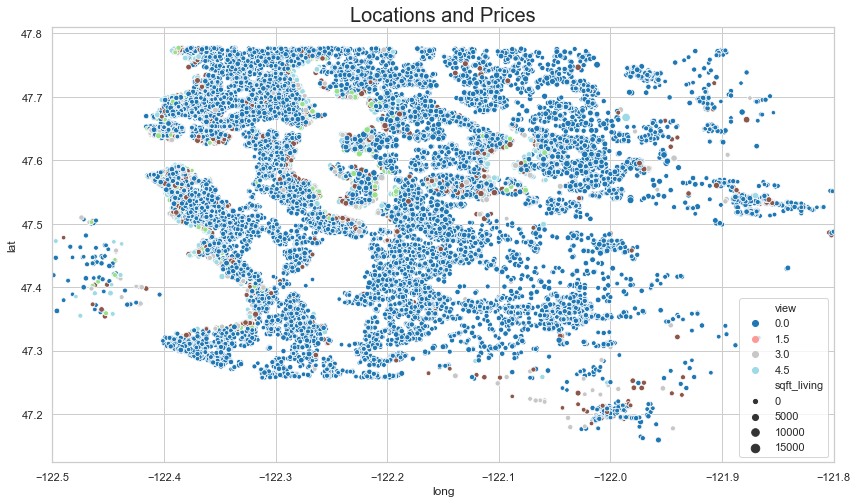

In [139]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.view, size=df.sqft_living, palette='tab20')
plt.xlim(-122.5, -121.8)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

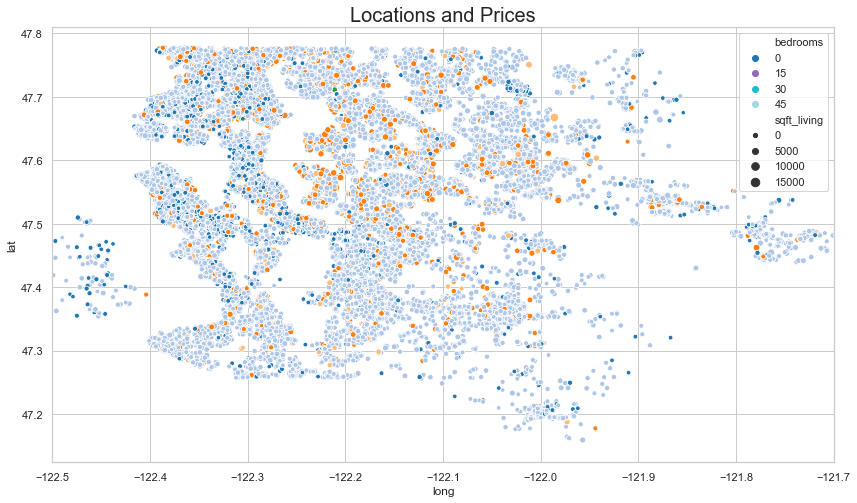

In [140]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.bedrooms, size=df.sqft_living, palette='tab20')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

In [220]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.sqft_lot, size=df.sqft_lot, palette='tab20')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sqft_lot'

<Figure size 1008x576 with 0 Axes>

## Correlation Matrix

Before I start label encoding I want to check correlation matrix to see if there is any column that I need to drop.  

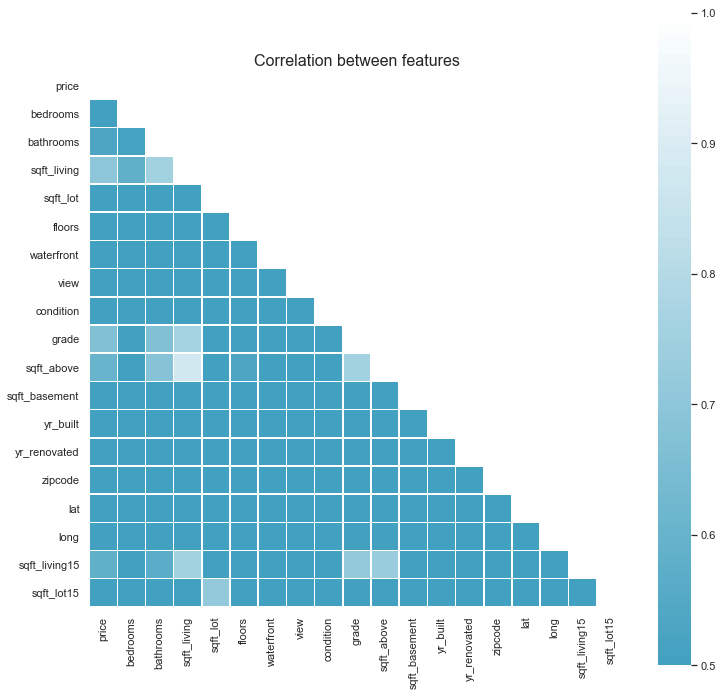

In [141]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='ocean')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

There is strong correlation between  sqft_above and sqft_living. I will drop sqft_above because sqft_living might be more handy for further analysis

In [142]:
df=df.drop('sqft_above', axis=1)

In [143]:
"""# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(df)
plt.show()
"""

'# library & dataset\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n \n# Basic correlogram\nsns.pairplot(df)\nplt.show()\n'

In [144]:
"""# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plot.show()"""


'# library & dataset\nimport matplotlib.pyplot as plt\nimport seaborn as sns\ndf = sns.load_dataset(\'iris\')\n \n# with regression\nsns.pairplot(df, kind="reg")\nplt.show()\n \n# without regression\nsns.pairplot(df, kind="scatter")\nplot.show()'

In [145]:
## exploration 


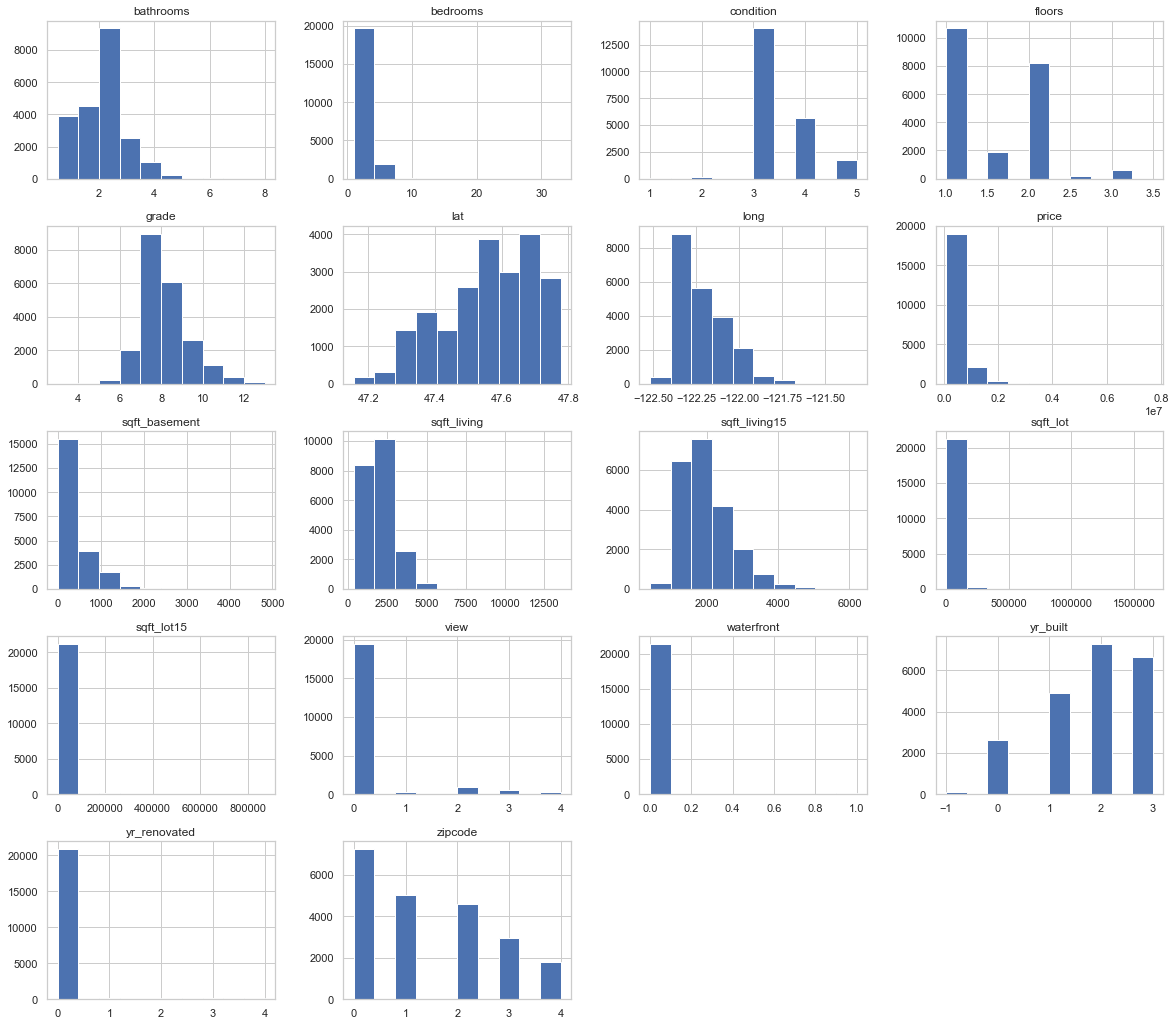

In [146]:
df.hist(figsize = (20,18));

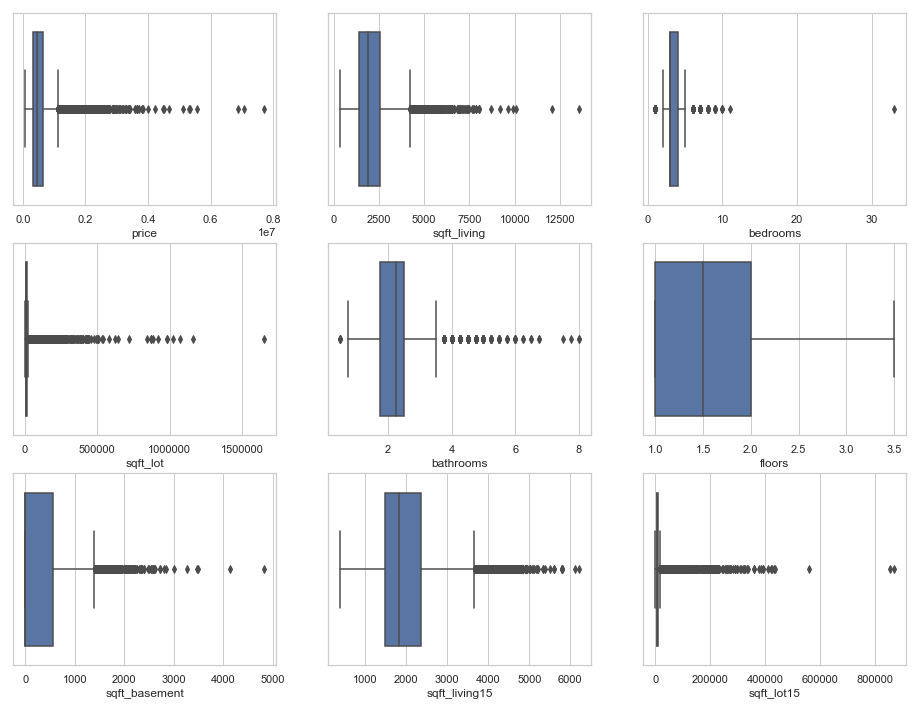

In [147]:
#there are outliers almost in every feature.

plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms)
plt.subplot(336)
sns.boxplot(df.floors)
plt.subplot(337)
sns.boxplot(df.sqft_basement)
plt.subplot(338)
sns.boxplot(df.sqft_living15)
plt.subplot(339)
sns.boxplot(df.sqft_lot15)

In [148]:
df= df[(df['price'] <= 400000)]
df= df[(df['sqft_living'] <= 8000)]
df= df[(df['bedrooms'] <= 6)]
df= df[(df['sqft_lot'] <= 300000)]
df= df[(df['bathrooms'] <= 4)]
df= df[(df['sqft_basement'] <= 2500)]
df= df[(df['sqft_living15'] <= 5500)]
df= df[(df['sqft_lot15'] <= 250000)]

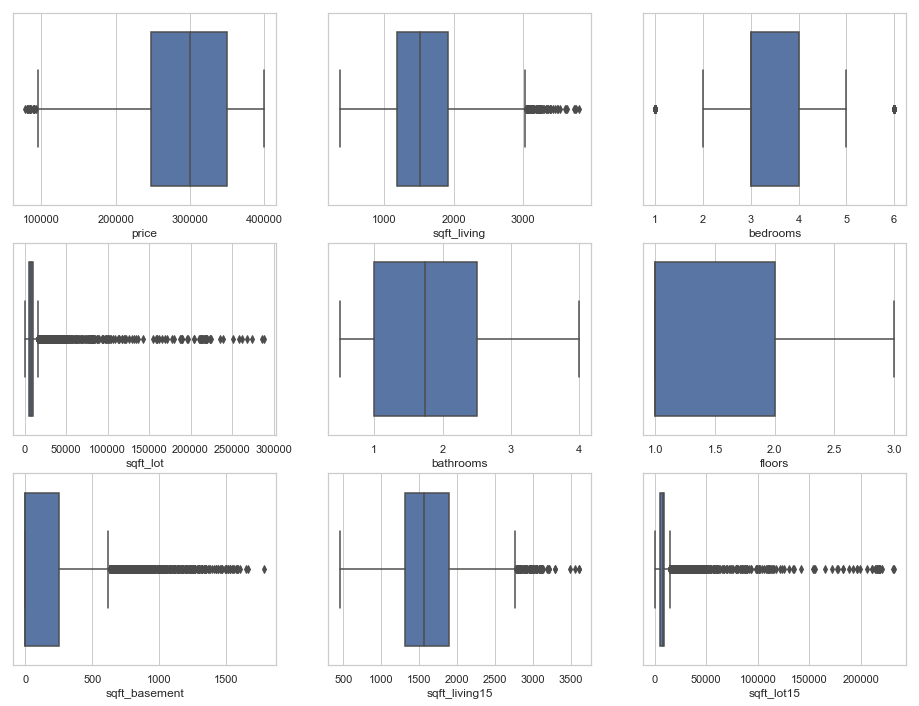

In [149]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms)
plt.subplot(336)
sns.boxplot(df.floors)
plt.subplot(337)
sns.boxplot(df.sqft_basement)
plt.subplot(338)
sns.boxplot(df.sqft_living15)
plt.subplot(339)
sns.boxplot(df.sqft_lot15)

In [150]:
df.waterfront=df.waterfront.astype('category', inplace=True)
df.waterfront = df.waterfront.cat.codes
df.grade=df.grade.astype('category', inplace=True)
df.grade = df.grade.cat.codes

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 21596
Data columns (total 19 columns):
date             8793 non-null datetime64[ns]
price            8793 non-null float64
bedrooms         8793 non-null int64
bathrooms        8793 non-null float64
sqft_living      8793 non-null int64
sqft_lot         8793 non-null int64
floors           8793 non-null float64
waterfront       8793 non-null int8
view             8793 non-null float64
condition        8793 non-null int64
grade            8793 non-null int8
sqft_basement    8793 non-null int64
yr_built         8793 non-null int8
yr_renovated     8793 non-null int8
zipcode          8793 non-null int8
lat              8793 non-null float64
long             8793 non-null float64
sqft_living15    8793 non-null int64
sqft_lot15       8793 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(7), int8(5)
memory usage: 1.0 MB


In [152]:
df=df.drop('sqft_lot15', axis =1)


In [153]:
df=df.drop('sqft_lot', axis =1)

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


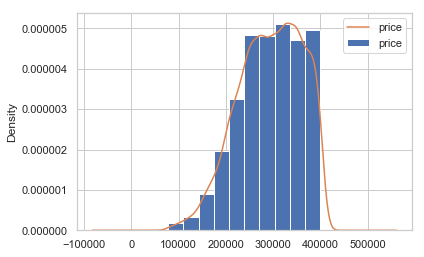

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


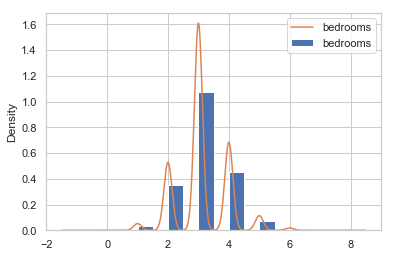

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


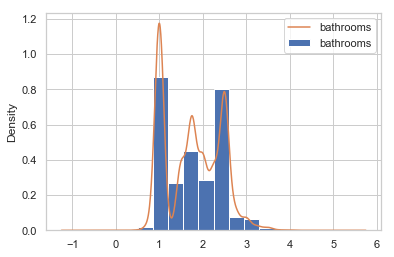

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


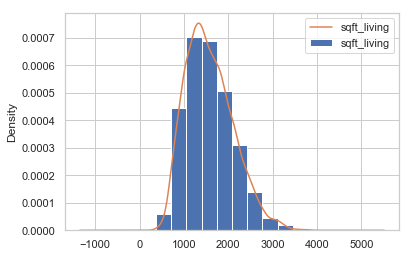

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


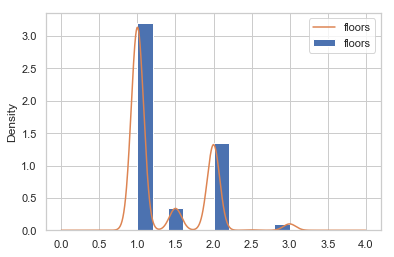

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


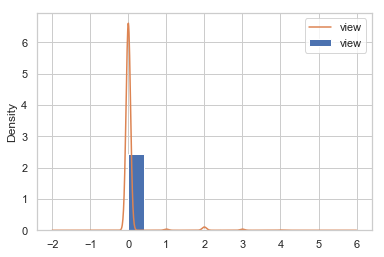

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


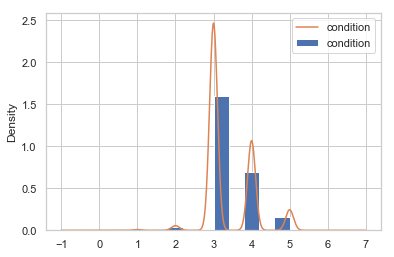

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


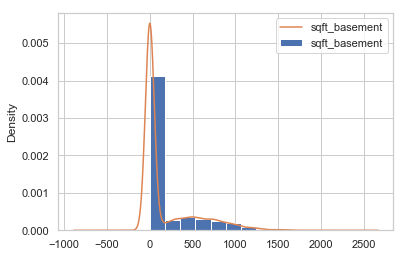

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


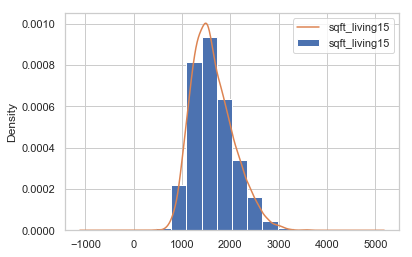

In [154]:
cols=['price', 'bedrooms', 'bathrooms', 'sqft_living', 
       'floors', 'view', 'condition', 'sqft_basement',
        'sqft_living15']
for i in cols:
    df[i].plot.hist(normed=True )
    df[i].plot.kde(label=i )
    plt.legend()
    plt.show()

# Label Encoding

In [155]:

df.condition.value_counts()

3    5644
4    2443
5     560
2     126
1      20
Name: condition, dtype: int64

In [156]:
df.condition= df['condition'].astype('category')

In [157]:
#df.condition=df.condition.cat.codes

In [158]:
df.condition.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


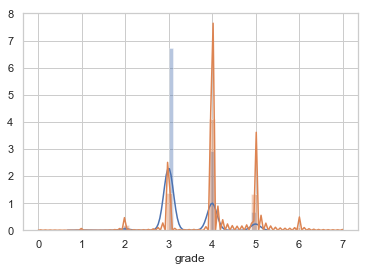

In [177]:
sns.distplot(df.condition)
sns.distplot(df.grade)


In [163]:
condition = pd.get_dummies(df.condition, prefix='cond', drop_first=True)

In [180]:
df=df.join(condition)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 21596
Data columns (total 21 columns):
date             8793 non-null datetime64[ns]
price            8793 non-null float64
bedrooms         8793 non-null int64
bathrooms        8793 non-null float64
sqft_living      8793 non-null int64
floors           8793 non-null float64
waterfront       8793 non-null int8
view             8793 non-null float64
condition        8793 non-null category
grade            8793 non-null int8
sqft_basement    8793 non-null int64
yr_built         8793 non-null int8
yr_renovated     8793 non-null int8
zipcode          8793 non-null int8
lat              8793 non-null float64
long             8793 non-null float64
sqft_living15    8793 non-null int64
cond_2           8793 non-null uint8
cond_3           8793 non-null uint8
cond_4           8793 non-null uint8
cond_5           8793 non-null uint8
dtypes: category(1), datetime64[ns](1), float64(6), int64(4), int8(5), uint8(4)
memory usage: 1.

In [183]:
df.zipcode=df['zipcode'].astype('category')

In [185]:
df.zipcode=df.zipcode.cat.codes

In [189]:
zipcode=pd.get_dummies(df.zipcode, prefix='zip', drop_first=True)

In [190]:
df.zipcode.dtypes

dtype('int8')

In [192]:
zipcode.dtypes

zip_1    uint8
zip_2    uint8
zip_3    uint8
zip_4    uint8
dtype: object

In [193]:
df=df.join(zipcode)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 21596
Data columns (total 25 columns):
date             8793 non-null datetime64[ns]
price            8793 non-null float64
bedrooms         8793 non-null int64
bathrooms        8793 non-null float64
sqft_living      8793 non-null int64
floors           8793 non-null float64
waterfront       8793 non-null int8
view             8793 non-null float64
condition        8793 non-null int8
grade            8793 non-null int8
sqft_basement    8793 non-null int64
yr_built         8793 non-null int8
yr_renovated     8793 non-null int8
zipcode          8793 non-null int8
lat              8793 non-null float64
long             8793 non-null float64
sqft_living15    8793 non-null int64
cond_2           8793 non-null uint8
cond_3           8793 non-null uint8
cond_4           8793 non-null uint8
cond_5           8793 non-null uint8
zip_1            8793 non-null uint8
zip_2            8793 non-null uint8
zip_3            8793 non-

In [197]:
df.floors=df.floors.astype('category')

In [198]:
df.floors=df.floors.cat.codes

In [199]:
floors=pd.get_dummies(df.floors, prefix='floor', drop_first=True)

In [209]:
df=df.join(floors)

ValueError: columns overlap but no suffix specified: Index(['floor_1', 'floor_2', 'floor_3', 'floor_4'], dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 21596
Data columns (total 29 columns):
date             8793 non-null datetime64[ns]
price            8793 non-null float64
bedrooms         8793 non-null int64
bathrooms        8793 non-null float64
sqft_living      8793 non-null int64
floors           8793 non-null int8
waterfront       8793 non-null int8
view             8793 non-null float64
condition        8793 non-null int8
grade            8793 non-null int8
sqft_basement    8793 non-null int64
yr_built         8793 non-null int8
yr_renovated     8793 non-null int8
zipcode          8793 non-null int8
lat              8793 non-null float64
long             8793 non-null float64
sqft_living15    8793 non-null int64
cond_2           8793 non-null uint8
cond_3           8793 non-null uint8
cond_4           8793 non-null uint8
cond_5           8793 non-null uint8
zip_1            8793 non-null uint8
zip_2            8793 non-null uint8
zip_3            8793 non-nul

No handles with labels found to put in legend.


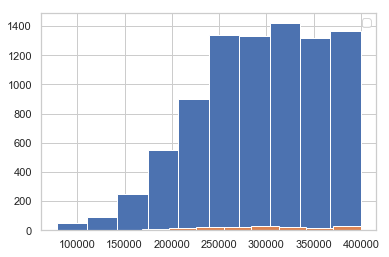

In [217]:
df.price[df.yr_renovated==0].hist()
df.price[df.yr_renovated!=0].hist()
plt.legend()

In [218]:
df.yr_renovated - df.yr_built

0       -1
2       -1
6       -3
7       -2
8       -1
9       -3
12       0
13      -2
16      -3
18       0
19      -2
20      -1
22      -3
23      -2
24      -2
25      -1
31      -3
34      -2
38      -2
44      -1
46      -2
50      -1
51      -2
56      -3
57      -3
61      -1
65       0
67      -3
68      -2
71      -2
        ..
21510   -3
21515   -3
21519   -3
21520   -3
21521   -3
21522   -3
21523   -3
21531   -3
21533   -3
21534   -3
21538   -3
21543   -3
21547   -3
21549   -3
21553   -3
21554   -3
21556   -3
21559   -3
21562   -3
21567   -1
21568   -3
21569   -3
21571   -3
21573   -3
21578   -3
21586   -3
21592   -3
21593   -3
21595   -3
21596   -3
Length: 8793, dtype: int8